In [ ]:
import networkx as nx

## buscas

### extra

In [ ]:
from scipy.spatial.distance import euclidean

def graph_color(G, path):
  start = path[0]
  target = path[-1]
  color_dict = {
      'start': '#AA4499',
      'target': '#DDCC77',
      'path': '#117733',
      'other': '#88CCEE'
  }
  color = []
  for node in G.nodes():
    if node == start:
      color.append(color_dict['start'])
    elif node == target:
      color.append(color_dict['target'])
    elif node in path:
      color.append(color_dict['path'])
    else:
      color.append(color_dict['other'])
  return color

def print_path(G, node_positions, path=None):
  if path is None:
    print('sem caminho do inicio para o alvo')
    return
  cost = 0
  for i, p in enumerate(path):
    if i == 0:
      continue
    cost += euclidean(G.nodes[p]['position'], G.nodes[path[i-1]]['position'])
  print(f'caminho: {path}, custo = {cost}')
  if node_positions is None:
    return
  nx.draw_networkx(G, pos=node_positions, with_labels=False, node_color=graph_color(G, path))

### buscas cegas

In [ ]:
# baseado em: https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

def bfs(G, start, target):
  visited = [False] * (len(G.nodes()) + 1)
  queue = []
  queue.append([start]) # [start, neighbor, ..., ...]
  visited[start] = True

  while queue:
    path = queue.pop(0)
    node = path[-1]
    if node == target:
      return path
    for neighbor in G.neighbors(node):
      if visited[neighbor] == False:
        new_path = list(path)
        new_path.append(neighbor)
        queue.append(new_path)
        visited[neighbor] = True
    #print(queue)
  return None

def dfs(G, start, target):
  visited = [False] * (len(G.nodes()) + 1)
  stack = []
  stack.append([start])
  visited[start] = True

  while stack:
    path = stack.pop()
    node = path[-1]
    if node == target:
      return path
    for neighbor in G.neighbors(node):
      if visited[neighbor] == False:
        new_path = list(path)
        new_path.append(neighbor)
        stack.append(new_path)
        visited[neighbor] = True
    #print(stack)
  return None

### buscas heurísticas

In [ ]:
from copy import deepcopy
# baseado em: https://www.geeksforgeeks.org/a-search-algorithm/ e https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
def a_search(G, start, target, distance_multiplier=1):
  G_astar = deepcopy(G)
  open_list = [start]
  G_astar.nodes[start]['f'] = 0
  G_astar.nodes[start]['g'] = 0
  closed_list = []
  while open_list:
    open_list.sort(key=(lambda x: G_astar.nodes[x]['f']))
    q = open_list.pop(0)
    closed_list.append(q)
    if q == target:
      current = q
      path = []
      while True:
        path.append(current)
        try:
          current = G_astar.nodes[current]['parent']
        except:
          return path[::-1] # path reverso
    for sucessor in G_astar.neighbors(q):
      if sucessor in closed_list:
        continue
      # valores temporarios
      temp_g = G_astar.nodes[q]['g'] + euclidean(G_astar.nodes[q]['position'], G_astar.nodes[sucessor]['position'])
      temp_h = distance_multiplier * euclidean(G_astar.nodes[sucessor]['position'], G_astar.nodes[target]['position'])
      temp_f = temp_g + temp_h

      # verificar se nó não esta na lista aberta com um melhor caminho anterior
      if sucessor in open_list and temp_g > G_astar.nodes[sucessor]['g']:
        continue

      # insercao de dados para lista
      G_astar.nodes[sucessor]['g'] = temp_g
      G_astar.nodes[sucessor]['f'] = temp_f
      G_astar.nodes[sucessor]['parent'] = q

      open_list.append(sucessor)
    #print(open_list)

def bestfirstgreedy(G, start, target):
  G_best = deepcopy(G)
  open_list = [start]
  closed_list = []
  G_best.nodes[start]['h'] = euclidean(G_best.nodes[start]['position'], G_best.nodes[target]['position'])
  while open_list:
    open_list.sort(key=(lambda x: G_best.nodes[x]['h']))
    q = open_list.pop(0)
    closed_list.append(q)
    if q == target:
      current = q
      path = []
      while True:
        path.append(current)
        try:
          current = G_best.nodes[current]['parent']
        except:
          return path[::-1] # path reverso
    for sucessor in G_best.neighbors(q):
      if sucessor in closed_list:
        continue

      G_best.nodes[sucessor]['h'] = euclidean(G_best.nodes[sucessor]['position'], G_best.nodes[target]['position'])
      G_best.nodes[sucessor]['parent'] = q

      open_list.append(sucessor)
    print(open_list)

def hillclimbing(G, start, target):
  G_hill = deepcopy(G)
  open_list = [start]
  closed_list = []
  G_hill.nodes[start]['h'] = euclidean(G_hill.nodes[start]['position'], G_hill.nodes[target]['position'])
  while open_list:
    open_list.sort(key=(lambda x: G_hill.nodes[x]['h']))
    q = open_list.pop(0)
    closed_list.append(q)
    if q == target:
      current = q
      path = []
      while True:
        path.append(current)
        try:
          current = G_hill.nodes[current]['parent']
        except:
          return path[::-1] # path reverso
    # amnesia
    open_list = []
    for sucessor in G_hill.neighbors(q):
      if sucessor in closed_list:
        continue

      G_hill.nodes[sucessor]['h'] = euclidean(G_hill.nodes[sucessor]['position'], G_hill.nodes[target]['position'])
      G_hill.nodes[sucessor]['parent'] = q

      # so verifica se for melhor
      if G_hill.nodes[sucessor]['h'] < G_hill.nodes[q]['h']:
        open_list.append(sucessor)
    print(open_list)

## grafo

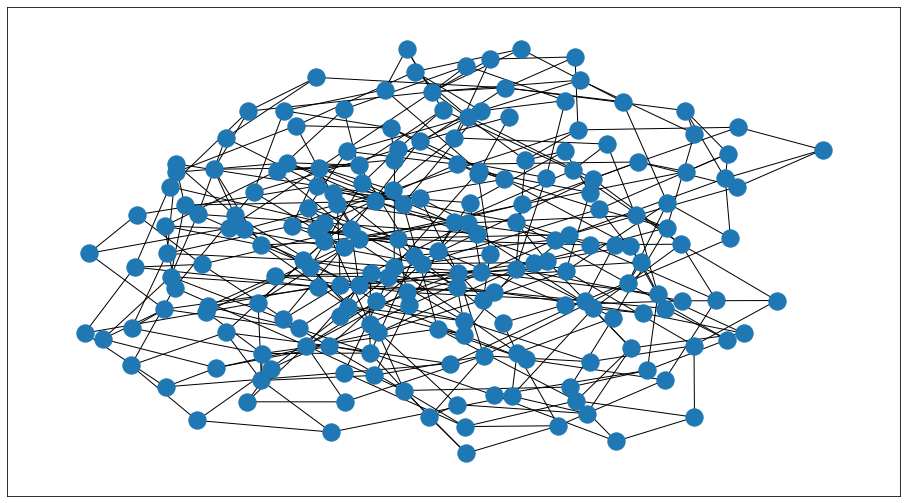

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

G = nx.generators.random_graphs.newman_watts_strogatz_graph(200, 2, 0.99, seed=42)
node_positions = nx.spring_layout(G, k=0.15, scale=100)
positions = { node: (int(pos[0]),int(pos[1])) for node,pos in node_positions.items() }
for node in G.nodes():
  G.nodes[node]['position'] = positions[node]
nx.draw_networkx(G, pos=node_positions, with_labels=False)

## exemplos de uso

### bfs

caminho: [0, 1, 2, 60, 99, 100], custo = 180.2454796444063


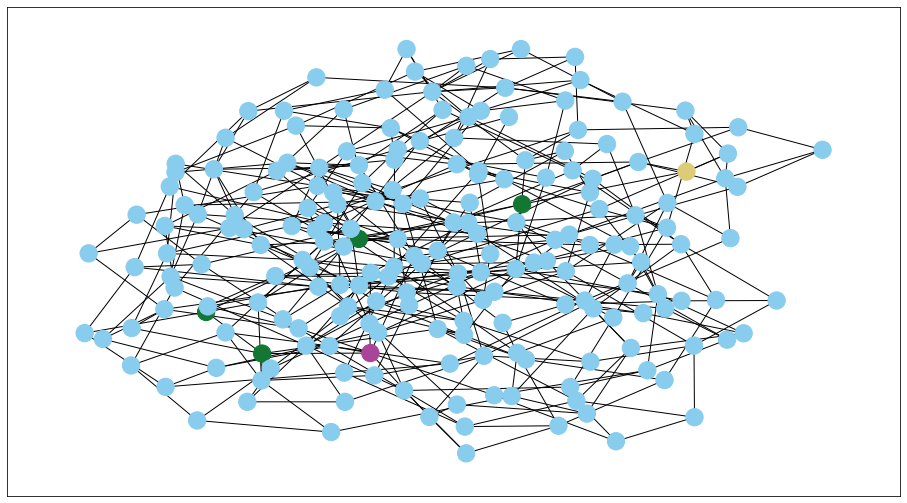

In [ ]:
print_path(G, path=bfs(G, 0, 100), node_positions=node_positions)

### dfs

caminho: [0, 74, 26, 162, 168, 105, 193, 194, 188, 191, 190, 45, 127, 142, 149, 18, 11, 172, 173, 197, 9, 56, 108, 85, 86, 138, 60, 120, 121, 124, 100], custo = 965.0971536277978


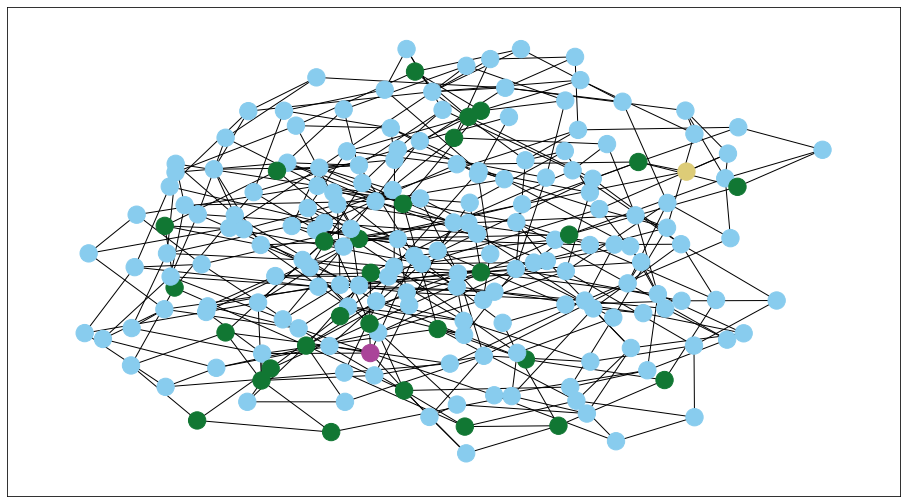

In [ ]:
print_path(G, path=dfs(G, 0, 100), node_positions=node_positions)

### hillclimbing

In [ ]:
print_path(G, path=hillclimbing(G, 0, 100), node_positions=node_positions)

[62, 74]
[103]
[102]
[]
sem caminho do inicio para o alvo


### bestfirst

[1, 199, 6, 62, 74]
[74, 6, 1, 199, 61, 63, 137, 103]
[137, 61, 63, 74, 6, 1, 199, 102, 104]
[137, 61, 63, 104, 74, 6, 1, 199, 101, 51, 146, 122]
[146, 122, 51, 137, 61, 63, 104, 74, 6, 1, 199, 100, 33, 146]
caminho: [0, 62, 103, 102, 101, 100], custo = 155.52823952912644


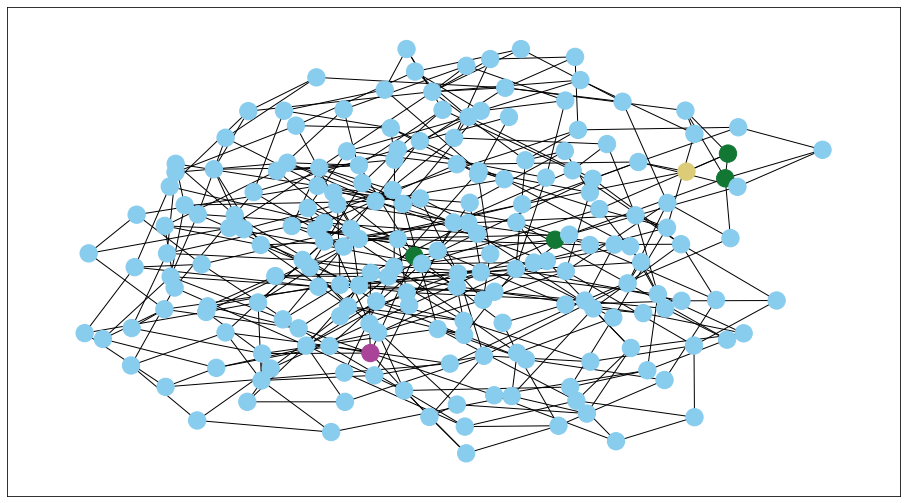

In [ ]:
print_path(G, path=bestfirstgreedy(G, 0, 100), node_positions=node_positions)

### A*

caminho: [0, 62, 103, 102, 101, 100], custo = 155.52823952912644


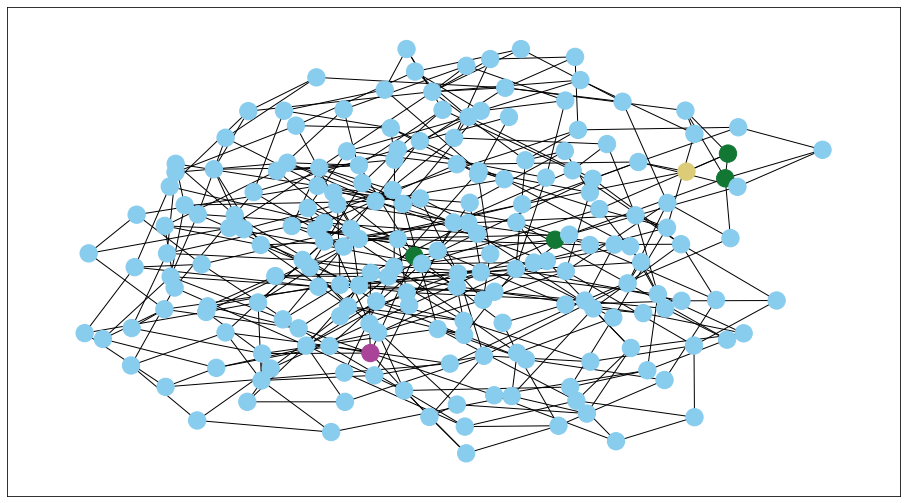

In [ ]:
print_path(G, path=a_search(G, 0, 100), node_positions=node_positions)

### A

caminho: [0, 62, 103, 102, 101, 100], custo = 155.52823952912644


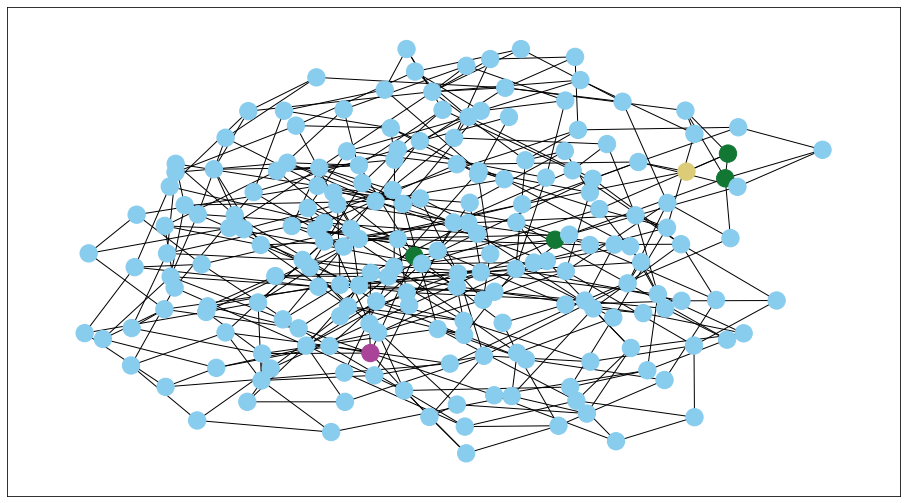

In [ ]:
print_path(G, path=a_search(G, 0, 100, distance_multiplier=10), node_positions=node_positions)